In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Marketing Funnel
closed_deals = pd.read_csv('/content/drive/MyDrive/Olist Order Payments Dataset/olist_closed_deals_dataset.csv')
marketing_qualified_leads = pd.read_csv('/content/drive/MyDrive/Olist Order Payments Dataset/olist_marketing_qualified_leads_dataset.csv')

# Orders
customers = pd.read_csv('/content/drive/MyDrive/Olist Order Payments Dataset/olist_customers_dataset.csv')
geolocation = pd.read_csv('/content/drive/MyDrive/Olist Order Payments Dataset/olist_geolocation_dataset.csv')
order_items = pd.read_csv('/content/drive/MyDrive/Olist Order Payments Dataset/olist_order_items_dataset.csv')
order_payments = pd.read_csv('/content/drive/MyDrive/Olist Order Payments Dataset/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('/content/drive/MyDrive/Olist Order Payments Dataset/olist_order_reviews_dataset.csv')
orders = pd.read_csv('/content/drive/MyDrive/Olist Order Payments Dataset/olist_orders_dataset.csv')
products = pd.read_csv('/content/drive/MyDrive/Olist Order Payments Dataset/olist_products_dataset.csv')
sellers = pd.read_csv('/content/drive/MyDrive/Olist Order Payments Dataset/olist_sellers_dataset.csv')
product_category = pd.read_csv('/content/drive/MyDrive/Olist Order Payments Dataset/product_category_name_translation.csv')

In [4]:
closed_deals.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0


In [5]:
# Object to check unique cols in a dataframe
class DataQualityChecker:
    def __init__(self):
        pass

    def check_uniqueness(self, df: pd.DataFrame, cols: list | str) -> bool:
        """
        Checks if a DataFrame is unique based on a column or set of columns.

        Args:
            df (pd.DataFrame): The DataFrame to check.
            cols (list | str): A single column name or a list of column names.

        Returns:
            bool: True if unique, False otherwise.
        """
        # Ensure cols is a list for consistent processing
        if isinstance(cols, str):
            cols = [cols]

        # 1. Validate columns exist
        missing_cols = [c for c in cols if c not in df.columns]
        if missing_cols:
            raise ValueError(f"Columns not found in DataFrame: {missing_cols}")

        # 2. Check for duplicates
        # keep=False ensures all instances of duplicates are marked True
        is_duplicated = df.duplicated(subset=cols, keep=False)

        if not is_duplicated.any():
            print(f"✅ Yes, DataFrame is unique on {cols} provided.")
            return True
        else:
            print(f"❌ No, DataFrame is NOT unique on {cols} provided.")

            # 3. Get examples of non-unique values
            # Filter for duplicates, select only the relevant columns, drop true exact duplicates
            # to show just the values causing the issue, and take the top 5.
            duplicate_examples = df.loc[is_duplicated, cols].drop_duplicates().head(5)

            print("\nExamples of values causing duplication:")
            print(duplicate_examples.to_string(index=False))
            return False



In [6]:
checker = DataQualityChecker()

print('Check Unique ID for customers')
checker.check_uniqueness(customers, 'customer_id')
print('\n')

print('Check Unique ID for orders')
checker.check_uniqueness(orders, ['order_id'])
print('\n')

print('Check Unique ID for order_items')
checker.check_uniqueness(order_items, ['order_id','order_item_id'])
print('\n')

print('Check Unique ID for order_payments')
checker.check_uniqueness(order_payments, ['order_id','payment_sequential'])
print('\n')

print('Check Unique ID for order_reviews')
checker.check_uniqueness(order_reviews, ['review_id','order_id'])
print('\n')

print('Check Unique ID for sellers')
checker.check_uniqueness(sellers, ['seller_id'])
print('\n')

print('Check Unique ID for products')
checker.check_uniqueness(products, ['product_id'])
print('\n')

print('Check Unique ID for product_category')
checker.check_uniqueness(product_category, ['product_category_name'])
print('\n')

Check Unique ID for customers
✅ Yes, DataFrame is unique on ['customer_id'] provided.


Check Unique ID for orders
✅ Yes, DataFrame is unique on ['order_id'] provided.


Check Unique ID for order_items
✅ Yes, DataFrame is unique on ['order_id', 'order_item_id'] provided.


Check Unique ID for order_payments
✅ Yes, DataFrame is unique on ['order_id', 'payment_sequential'] provided.


Check Unique ID for order_reviews
✅ Yes, DataFrame is unique on ['review_id', 'order_id'] provided.


Check Unique ID for sellers
✅ Yes, DataFrame is unique on ['seller_id'] provided.


Check Unique ID for products
✅ Yes, DataFrame is unique on ['product_id'] provided.


Check Unique ID for product_category
✅ Yes, DataFrame is unique on ['product_category_name'] provided.




In [7]:
#geolocation[geolocation['geolocation_zip_code_prefix']==1037]
#order_payments[order_payments['order_id']=='5cfd514482e22bc992e7693f0e3e8df7']
order_reviews[order_reviews['review_id']=='a0a641414ff718ca079b3967ef5c2495']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
344,a0a641414ff718ca079b3967ef5c2495,169d7e0fd71d624d306f132acd791cbe,5,NaN,NaN,2018-03-04 00:00:00,2018-03-06 20:12:53
27356,a0a641414ff718ca079b3967ef5c2495,4e93b736e8d687bca088c6ee496437e8,5,NaN,NaN,2018-03-04 00:00:00,2018-03-06 20:12:53


# Data Schema

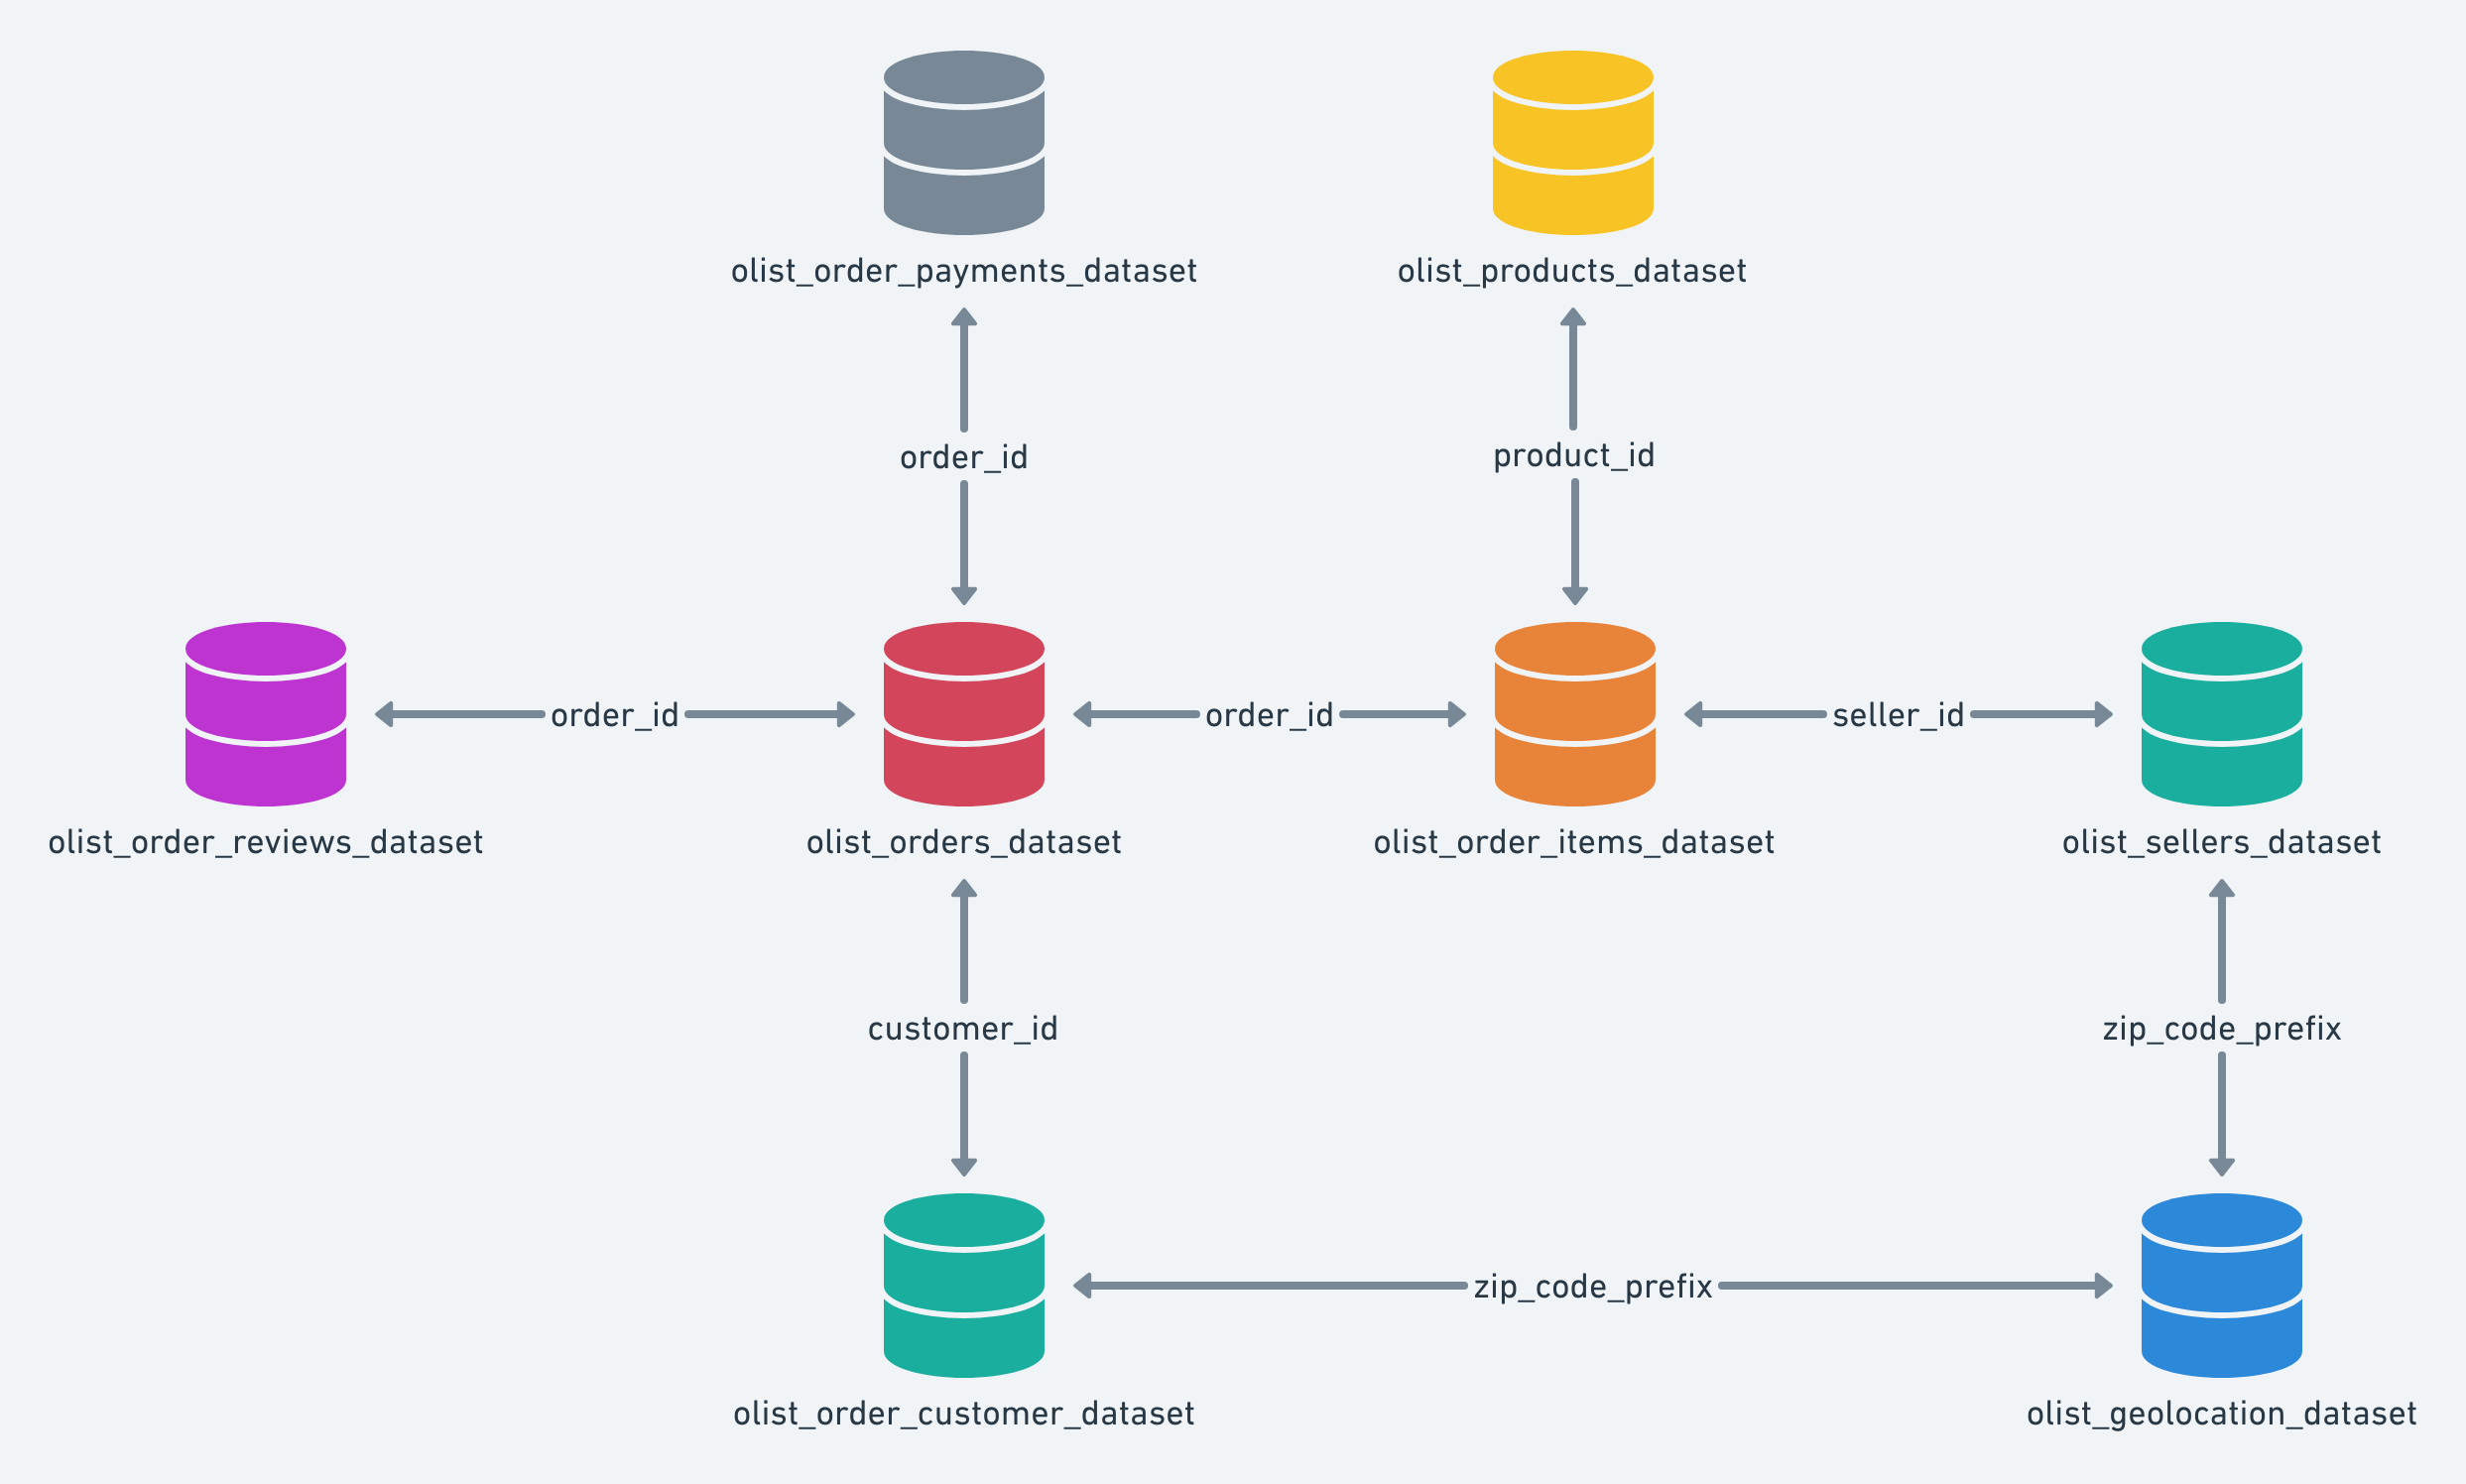

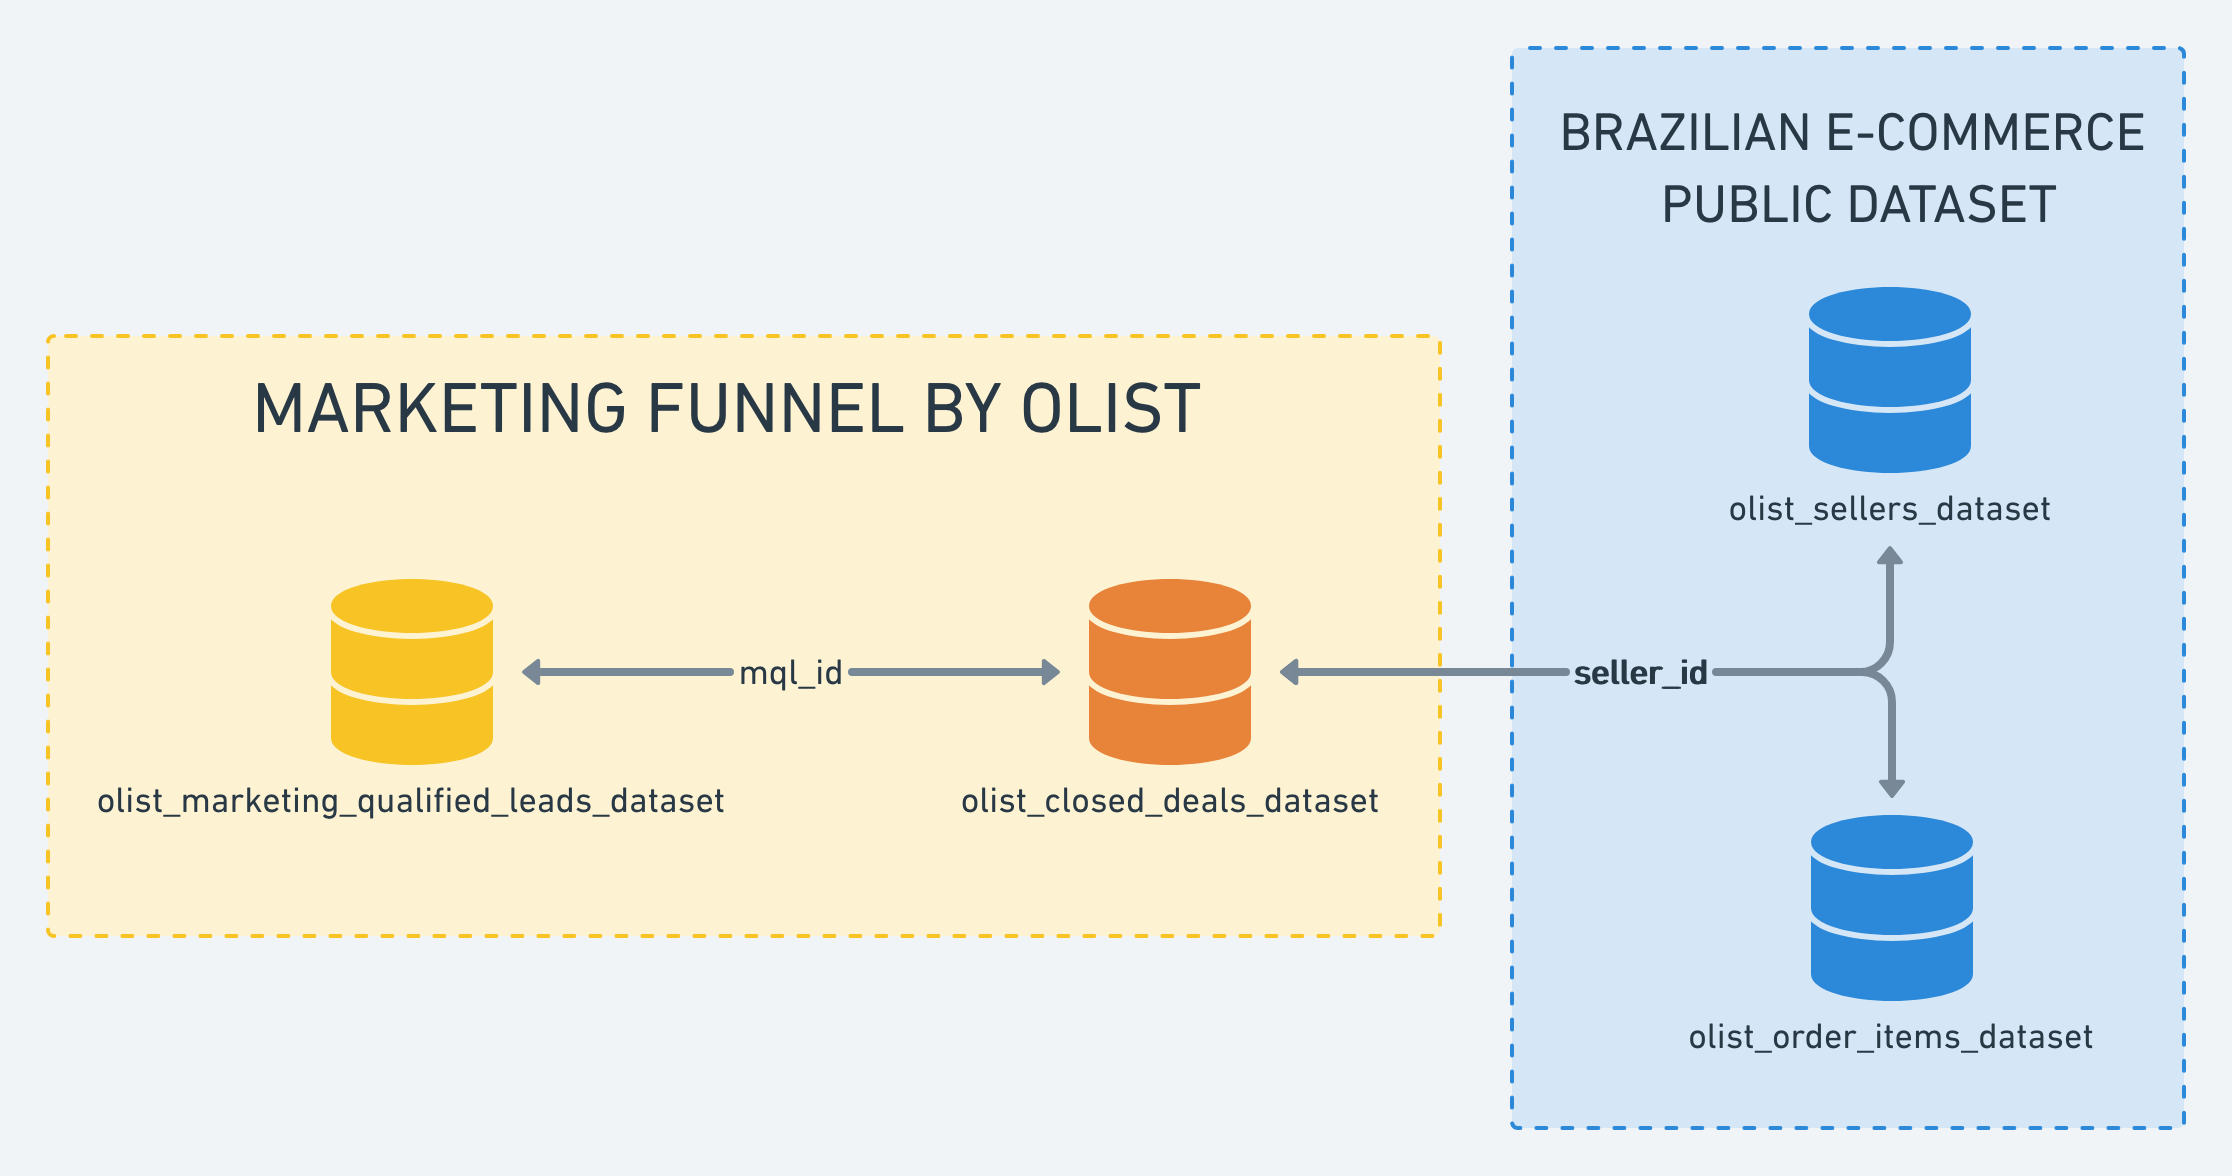



# Product Funnels

In [12]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

class OlistFunnelAnalyzer:
    def __init__(self, marketing_qualified_leads, closed_deals, order_items, orders):
        self.marketing_qualified_leads = marketing_qualified_leads
        self.closed_deals = closed_deals
        self.order_items = order_items
        self.orders = orders

    def build_marketing_funnel(self):
        # ... (Same logic as before) ...
        total_leads = self.marketing_qualified_leads['mql_id'].nunique()
        total_closed = self.closed_deals['mql_id'].nunique()
        active_sellers_df = self.closed_deals.merge(self.order_items, on='seller_id', how='inner')
        total_active = active_sellers_df['seller_id'].nunique()

        return pd.DataFrame({
            'stage': ['Marketing Leads', 'Closed Deals', 'Active Sellers'],
            'count': [total_leads, total_closed, total_active]
        })

    def build_order_funnel(self):
        # ... (Same logic as before) ...
        step_1 = len(self.orders)
        step_2 = self.orders['order_approved_at'].notnull().sum()
        step_3 = self.orders['order_delivered_carrier_date'].notnull().sum()
        step_4 = self.orders['order_delivered_customer_date'].notnull().sum()

        return pd.DataFrame({
            'stage': ['Placed', 'Approved', 'Shipped', 'Delivered'],
            'count': [step_1, step_2, step_3, step_4]
        })

    def plot_horizontal_funnel(self, df, title):
        """
        Plots a clean horizontal funnel with conversion rates.
        """
        fig = go.Figure(go.Funnel(
            y = df['stage'],
            x = df['count'],
            textinfo = "value+percent previous", # Shows count and % of previous step
            orientation = "h",
            marker = {"color": ["#636EFA", "#EF553B", "#00CC96", "#AB63FA"]},
            connector = {"line": {"color": "gray", "dash": "solid", "width": 2}}
        ))

        fig.update_layout(
            title=title,
            yaxis_title="Funnel Stage",
            xaxis_title="Count",
            template="plotly_white"
        )
        fig.show()

    def plot_sankey_pipe(self, df, title):
        """
        Plots a 'Pipe Diagram' (Sankey) showing Flow vs. Dropoff.
        This explicitly visualizes the 'intersection' (kept) vs 'dropoff' (lost).
        """
        labels = []
        source = []
        target = []
        values = []
        colors = []

        # Define colors for flows
        color_success = "#00CC96" # Green
        color_drop = "#EF553B"    # Red

        # Build nodes and links
        # For each step, we have a node. We create a "Dropoff" node for each step.

        # Create labels for main stages
        stage_names = df['stage'].tolist()
        labels.extend(stage_names)

        # Create labels for Dropoff nodes (optional: can just share one "Lost" node)
        # Here we create specific dropoff nodes for clarity: "Lost after Placed", etc.
        for i in range(len(stage_names)-1):
            labels.append(f"Dropoff after {stage_names[i]}")

        # Indices for main stages
        stage_indices = list(range(len(stage_names)))

        for i in range(len(df) - 1):
            current_count = df.iloc[i]['count']
            next_count = df.iloc[i+1]['count']
            dropoff_count = current_count - next_count

            # Link: Current Stage -> Next Stage (Success)
            source.append(stage_indices[i])
            target.append(stage_indices[i+1])
            values.append(next_count)
            colors.append(color_success) # Green flow

            # Link: Current Stage -> Dropoff (Loss)
            if dropoff_count > 0:
                dropoff_index = len(stage_names) + i # logic to find the dropoff node index
                source.append(stage_indices[i])
                target.append(dropoff_index)
                values.append(dropoff_count)
                colors.append(color_drop) # Red flow

        fig = go.Figure(data=[go.Sankey(
            node = dict(
                pad = 15,
                thickness = 20,
                line = dict(color = "black", width = 0.5),
                label = labels,
                color = "blue"
            ),
            link = dict(
                source = source,
                target = target,
                value = values,
                color = colors
            ))])

        fig.update_layout(title_text=title, font_size=10)
        fig.show()

# --- EXECUTION ---

# 1. Initialize
analyzer = OlistFunnelAnalyzer(
    marketing_qualified_leads=marketing_qualified_leads,
    closed_deals=closed_deals,
    order_items=order_items,
    orders=orders
)

# 2. Get Data
marketing_data = analyzer.build_marketing_funnel()
order_data = analyzer.build_order_funnel()

# 3. OPTION A: Clean Horizontal Funnel (Best for slide decks)
analyzer.plot_horizontal_funnel(order_data, "Order Fulfillment Funnel (Horizontal)")

# 4. OPTION B: Sankey Pipe Diagram (Best for analyzing 'leaks')
analyzer.plot_sankey_pipe(order_data, "Order Fulfillment Flow & Dropoffs")
